# Bitcoin Preliminary Exploratory Analysis
### Author: Brian Scott

In [1]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

import statsmodels.api as st
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [2]:
# Import Dataset
D = pd.read_csv('MIS776_PROJECT_DB.xlsx - TheData.csv')

# Check for missing values
D.isnull().sum()

Date              0
close             0
%Change           0
EMA50             0
lagged EMA50      1
RSI               0
RSI-based MA      0
RSI-RSIMA         0
ATR               0
ADX               0
MACD              0
RP                0
RHODL             0
RR                0
MVRV-Z            0
SupplyP           0
MinerFeeRev%      0
Thermocap         0
AA                0
AVGFees           0
Puell             0
INVCAP            0
ASOPR            60
AccuTrend         0
NUPL              0
BTCINFLATION      0
Liveliness        0
NVT               0
CVDD              0
SP500           629
NASDAQ          628
POSNEG            0
Categories        0
dtype: int64

### Missing Value Determination
#### ASOPR, NASDAQ, and SP500 have the most missing values
##### NASDAQ and SP500 are missing values because those markets close on the weekends and holidays, but bitcoin does not
##### It is unclear at this point why ASOPR has missing values

In [3]:
# Determine where ASOPR is null
a =  (D["ASOPR"].isnull() == True)
np.where(a)[0]

array([1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838,
       1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849,
       1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887], dtype=int64)

### ASOPR is only missing at the end of the dataset. This metric has not been updated from the source. I will remove ASOPR from the rest of the analysis

In [4]:
#Remove columns with large amounts of missing values and interpolate the missing values in SP500 and NASDAQ
D = D.drop(['ASOPR','lagged EMA50'], axis=1)

D = D.interpolate()
D.isnull().sum()

Date            0
close           0
%Change         0
EMA50           0
RSI             0
RSI-based MA    0
RSI-RSIMA       0
ATR             0
ADX             0
MACD            0
RP              0
RHODL           0
RR              0
MVRV-Z          0
SupplyP         0
MinerFeeRev%    0
Thermocap       0
AA              0
AVGFees         0
Puell           0
INVCAP          0
AccuTrend       0
NUPL            0
BTCINFLATION    0
Liveliness      0
NVT             0
CVDD            0
SP500           0
NASDAQ          0
POSNEG          0
Categories      0
dtype: int64

### I am interested in prediction, so I want to see the correlation between the closing price and the 1 unit lag of the rest of the variables

In [6]:
indepVars = D.drop(["Date","Categories","POSNEG","%Change","close"], axis =1)
indepVars = indepVars.shift(1)
indepVars

,EMA50,RSI,RSI-based MA,RSI-RSIMA,ATR,ADX,MACD,RP,RHODL,RR,...,Puell,INVCAP,AccuTrend,NUPL,BTCINFLATION,Liveliness,NVT,CVDD,SP500,NASDAQ
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3468.602,70.03167,69.07807,0.953604,238.0244,24.80538,316.71160,1484.880,15836.9800,0.008347,...,2.523363,2.160000e+10,0.885551,0.661385,0.036245,0.562197,11.12091,708.4137,2444.24,6283.02
2,3512.931,74.25381,69.03747,5.216340,242.9391,24.54562,325.06600,1503.929,16704.7300,0.008672,...,3.004532,2.200000e+10,0.885167,0.671831,0.041976,0.562490,10.33938,714.7829,2446.30,6301.89
3,3554.855,73.36851,68.74985,4.618662,235.2049,24.30441,326.54930,1516.808,16573.2100,0.008911,...,3.437324,2.220000e+10,0.802684,0.668605,0.047447,0.563172,12.94998,719.6356,2457.59,6368.31
4,3601.485,76.26810,68.91826,7.349844,231.8467,24.55757,336.91000,1536.322,17586.8300,0.009114,...,3.383837,2.250000e+10,0.795081,0.675974,0.045997,0.563324,12.09772,724.5329,2471.65,6428.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,19794.570,52.58230,46.17949,6.402812,601.8786,12.13671,-104.79000,21107.740,273.8024,0.000896,...,0.571723,3.610000e+11,0.196883,-0.054290,0.018599,0.606634,36.73695,14670.3400,4057.66,12141.71
1884,19776.370,48.74811,46.53505,2.213065,590.6173,11.39102,-94.36820,21104.060,254.9407,0.000899,...,0.505887,3.610000e+11,0.274602,-0.066440,0.016300,0.606515,23.92772,14670.2200,4057.66,12141.71
1885,19788.520,58.84186,47.66426,11.177600,632.7246,12.02459,-24.83060,21108.990,230.4678,0.000910,...,0.460915,3.610000e+11,0.337855,-0.026510,0.014609,0.606484,18.79927,14675.2000,4057.66,12141.71
1886,19827.230,65.51082,49.17542,16.335390,656.5986,13.44567,84.90592,21117.810,288.3698,0.000953,...,0.616818,3.610000e+11,0.412929,0.006499,0.018596,0.606528,14.40350,14685.3200,4057.66,12141.71


In [8]:
# make a dataframe with the lagged variables and close
y = pd.DataFrame(D["close"])
catDF = y.join(indepVars)
df = catDF.dropna()
df.head()

,close,EMA50,RSI,RSI-based MA,RSI-RSIMA,ATR,ADX,MACD,RP,RHODL,...,Puell,INVCAP,AccuTrend,NUPL,BTCINFLATION,Liveliness,NVT,CVDD,SP500,NASDAQ
1,4599.00,3468.602,70.03167,69.07807,0.953604,238.0244,24.80538,316.7116,1484.880,15836.98,...,2.523363,2.160000e+10,0.885551,0.661385,0.036245,0.562197,11.12091,708.4137,2444.24,6283.02
2,4581.98,3512.931,74.25381,69.03747,5.216340,242.9391,24.54562,325.0660,1503.929,16704.73,...,3.004532,2.200000e+10,0.885167,0.671831,0.041976,0.562490,10.33938,714.7829,2446.30,6301.89
3,4743.94,3554.855,73.36851,68.74985,4.618662,235.2049,24.30441,326.5493,1516.808,16573.21,...,3.437324,2.220000e+10,0.802684,0.668605,0.047447,0.563172,12.94998,719.6356,2457.59,6368.31
4,4947.99,3601.485,76.26810,68.91826,7.349844,231.8467,24.55757,336.9100,1536.322,17586.83,...,3.383837,2.250000e+10,0.795081,0.675974,0.045997,0.563324,12.09772,724.5329,2471.65,6428.66
5,4649.99,3654.289,79.32267,69.76753,9.555138,232.5719,25.35321,357.4654,1554.812,18373.13,...,3.678179,2.280000e+10,0.747469,0.685379,0.049170,0.563654,11.88263,728.8602,2476.55,6435.33


## Box Plots

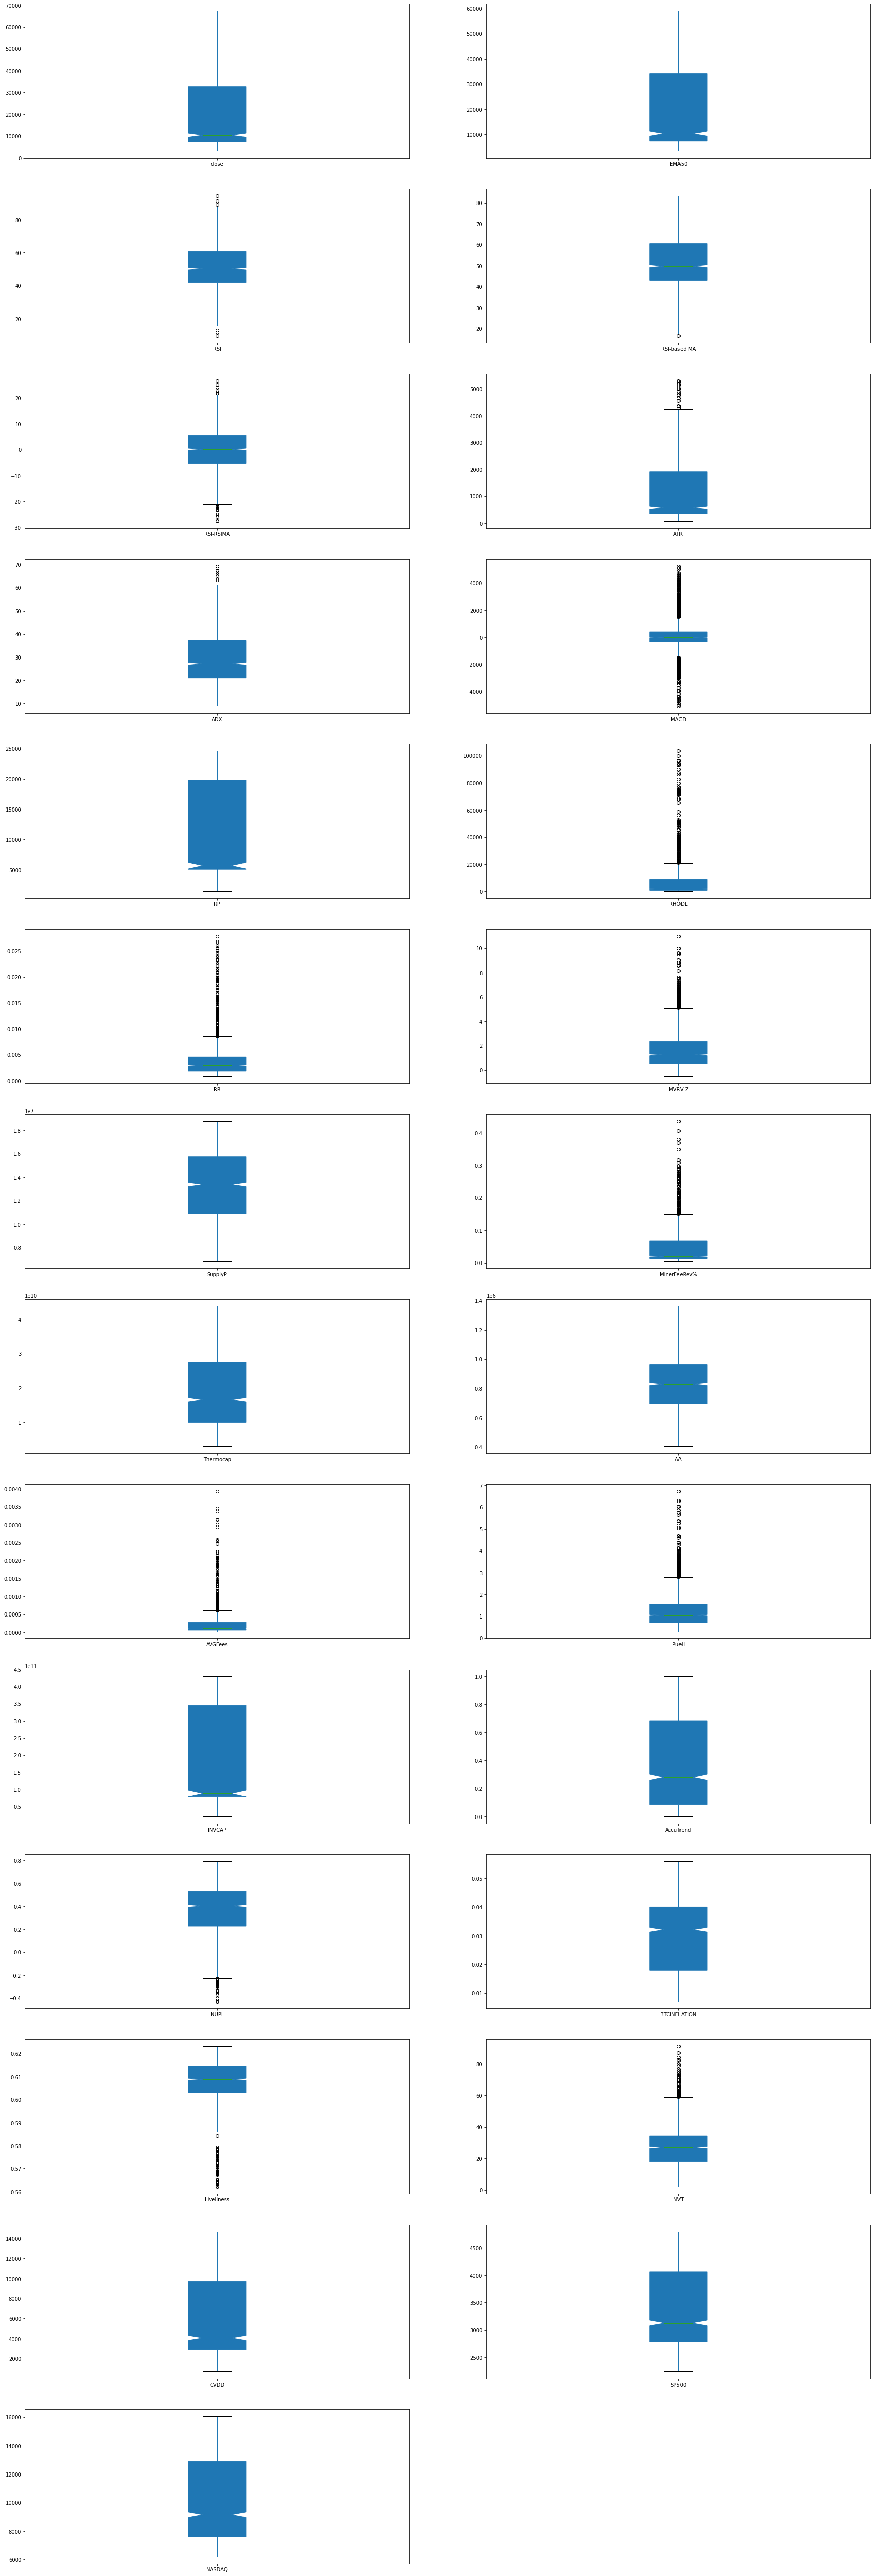

In [9]:
# Box and whisker plots. Univariate plots, one for each individual variable
fig, ax = plt.subplots(figsize = (30, 100),facecolor='w', edgecolor='k')
df.plot(kind='box' ,patch_artist=True,notch = True, subplots = True, layout=(15,2), sharex=False, sharey=False, ax= ax)
plt.show()

## Correlation Matrix

In [10]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(3)

,close,EMA50,RSI,RSI-based MA,RSI-RSIMA,ATR,ADX,MACD,RP,RHODL,RR,MVRV-Z,SupplyP,MinerFeeRev%,Thermocap,AA,AVGFees,Puell,INVCAP,AccuTrend,NUPL,BTCINFLATION,Liveliness,NVT,CVDD,SP500,NASDAQ
close,1.000,0.973,0.041,0.055,-0.013,0.899,0.007,0.172,0.842,0.021,0.028,0.425,0.484,0.045,0.682,0.588,-0.105,0.202,0.846,0.033,0.457,-0.687,0.606,0.109,0.723,0.885,0.895
EMA50,0.973,1.000,-0.117,-0.095,-0.054,0.907,0.007,-0.041,0.901,-0.020,-0.028,0.303,0.364,-0.019,0.740,0.532,-0.146,0.097,0.904,0.018,0.368,-0.706,0.635,0.078,0.787,0.910,0.898
RSI,0.041,-0.117,1.000,0.804,0.479,-0.074,0.137,0.640,-0.197,0.135,0.190,0.458,0.616,0.319,-0.168,0.291,0.198,0.386,-0.195,0.129,0.430,0.031,-0.184,0.033,-0.194,-0.046,0.020
RSI-based MA,0.055,-0.095,0.804,1.000,-0.136,-0.022,0.144,0.718,-0.213,0.213,0.249,0.526,0.636,0.437,-0.196,0.329,0.318,0.459,-0.210,0.205,0.497,0.027,-0.208,0.000,-0.222,-0.047,0.025
RSI-RSIMA,-0.013,-0.054,0.479,-0.136,1.000,-0.090,0.016,0.007,-0.013,-0.089,-0.051,-0.013,0.087,-0.114,0.009,-0.001,-0.140,-0.034,-0.014,-0.086,-0.018,0.012,0.000,0.054,0.004,-0.009,-0.004
ATR,0.899,0.907,-0.074,-0.022,-0.090,1.000,0.128,0.018,0.734,0.170,0.183,0.485,0.431,0.190,0.543,0.580,0.059,0.308,0.740,0.031,0.467,-0.596,0.614,0.062,0.597,0.752,0.773
ADX,0.007,0.007,0.137,0.144,0.016,0.128,1.000,-0.015,-0.045,0.245,0.194,0.173,0.142,0.264,-0.080,0.117,0.240,0.174,-0.044,0.447,0.130,-0.007,0.069,-0.076,-0.072,-0.013,0.002
MACD,0.172,-0.041,0.640,0.718,0.007,0.018,-0.015,1.000,-0.166,0.176,0.227,0.522,0.512,0.267,-0.169,0.260,0.167,0.435,-0.165,0.074,0.389,0.021,-0.071,0.127,-0.190,-0.026,0.056
RP,0.842,0.901,-0.197,-0.213,-0.013,0.734,-0.045,-0.166,1.000,-0.165,-0.225,0.012,0.105,-0.201,0.937,0.432,-0.284,-0.154,1.000,0.036,0.067,-0.751,0.625,-0.035,0.972,0.937,0.872
RHODL,0.021,-0.020,0.135,0.213,-0.089,0.170,0.245,0.176,-0.165,1.000,0.960,0.635,0.231,0.586,-0.341,0.224,0.778,0.751,-0.157,0.013,0.429,0.309,-0.167,-0.267,-0.264,-0.209,-0.210


In [11]:
# sort correlation values to see which variables relate to the closing value the highest
absCorr = abs(corr["close"])
absCorr.sort_values(ascending = False)

close           1.000000
EMA50           0.973110
ATR             0.899171
NASDAQ          0.894767
SP500           0.884809
INVCAP          0.845944
RP              0.841752
CVDD            0.723336
BTCINFLATION    0.686887
Thermocap       0.682422
Liveliness      0.606431
AA              0.587924
SupplyP         0.483897
NUPL            0.457197
MVRV-Z          0.425330
Puell           0.201560
MACD            0.172093
NVT             0.109234
AVGFees         0.104858
RSI-based MA    0.055203
MinerFeeRev%    0.044710
RSI             0.041288
AccuTrend       0.033077
RR              0.028488
RHODL           0.020744
RSI-RSIMA       0.012737
ADX             0.006800
Name: close, dtype: float64

### Histograms 

In [12]:
# Histogram Function
def desc_num_features(df,feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    df[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)

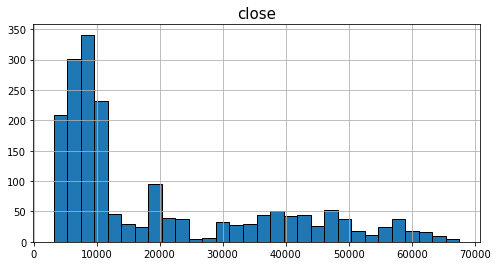

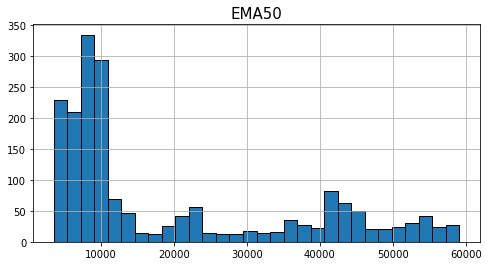

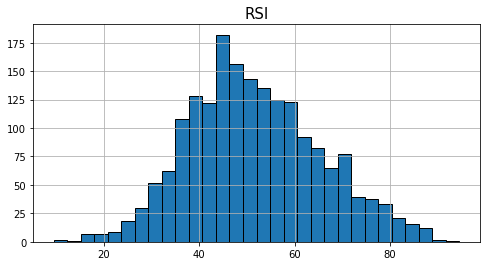

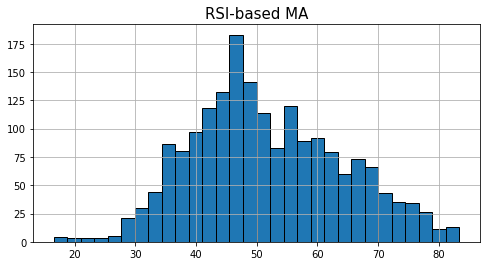

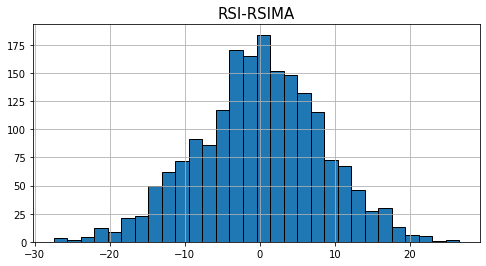

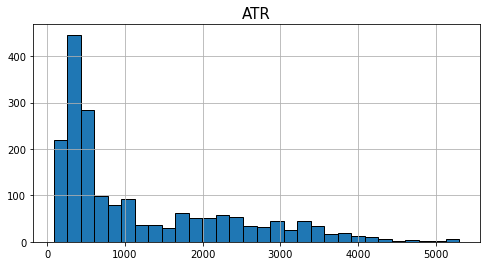

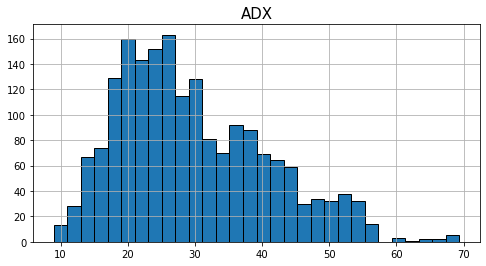

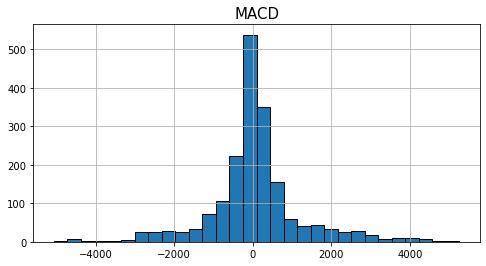

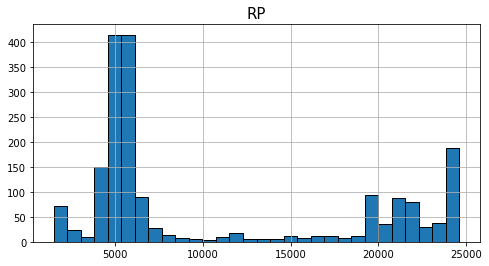

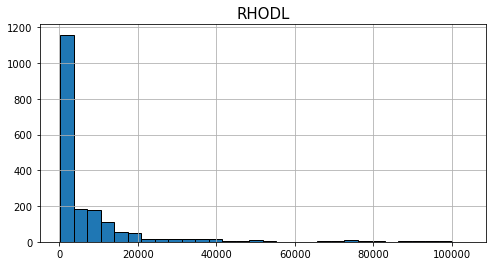

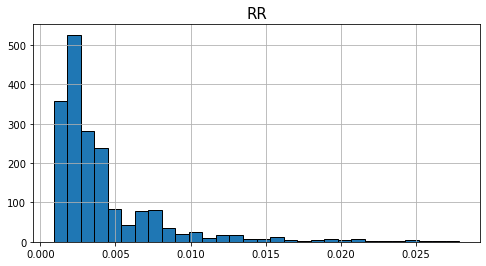

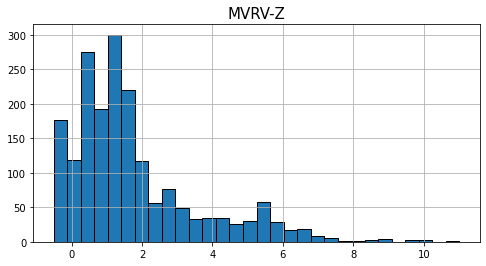

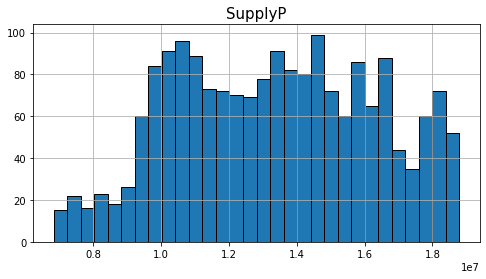

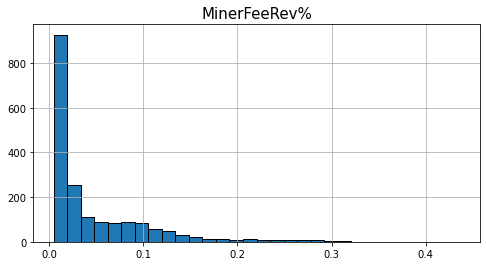

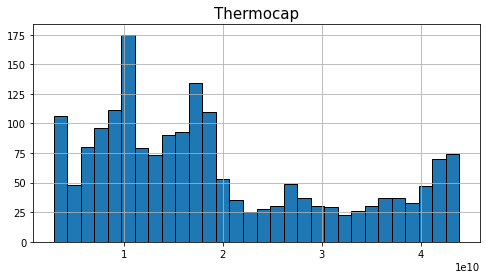

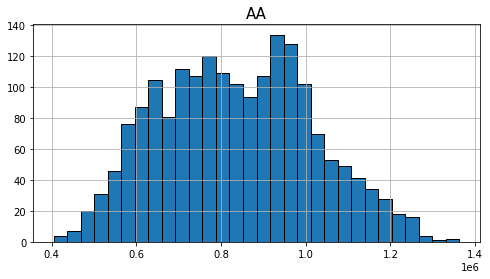

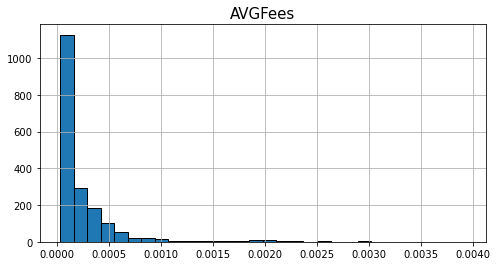

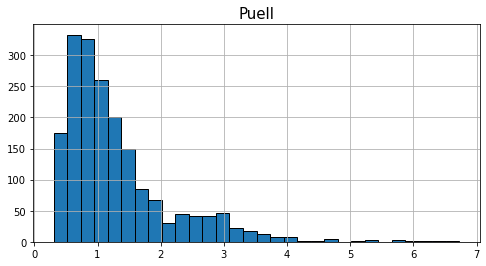

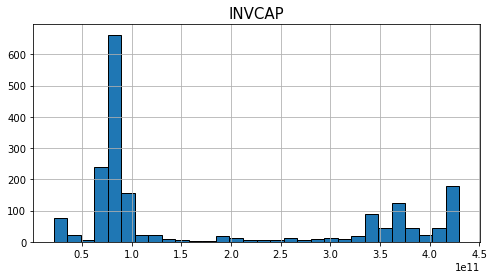

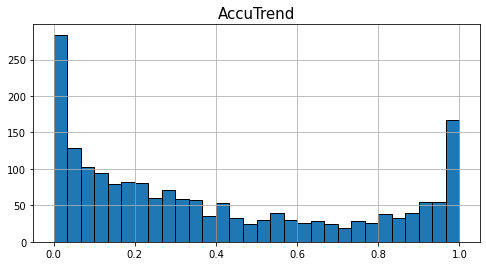

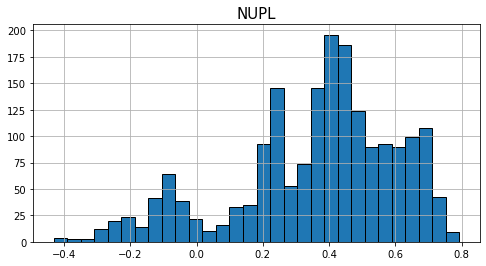

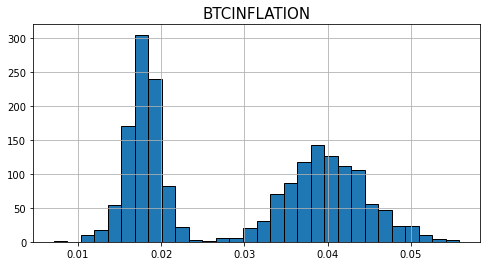

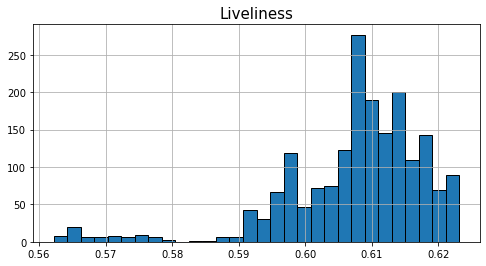

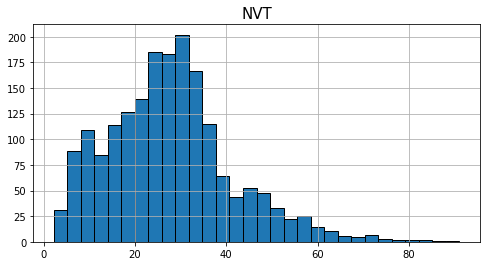

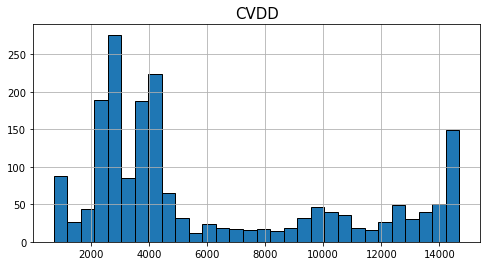

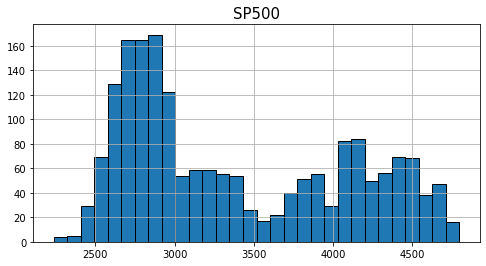

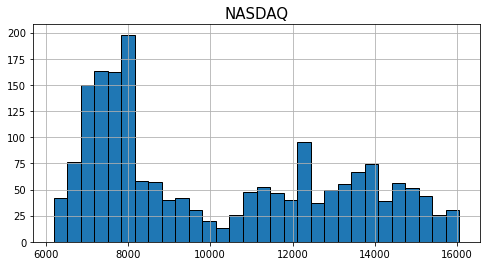

In [14]:
feats = corr.columns
for i in feats:
    desc_num_features(D,i)